In [1]:
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
#import dailyData
datadf = pd.read_csv("dailyData/dailyData.csv") 
#create a column and concatenate all 3 numbers
datadf.head()

,Draw Date,Draw Schedule,First Number,Second Number,Third Number
0,7/9/2019,Morning,8,1,3
1,7/9/2019,Evening,2,3,0
2,7/10/2019,Morning,9,9,5
3,7/10/2019,Evening,2,3,2
4,7/11/2019,Morning,4,3,2


In [2]:
datadf = datadf.drop('Draw Date', axis=1)

In [3]:
datadf.head()

,Draw Schedule,First Number,Second Number,Third Number
0,Morning,8,1,3
1,Evening,2,3,0
2,Morning,9,9,5
3,Evening,2,3,2
4,Morning,4,3,2


In [4]:
df2 = pd.get_dummies(datadf)

In [5]:
df2.head()

,First Number,Second Number,Third Number,Draw Schedule_Evening,Draw Schedule_Morning
0,8,1,3,0,1
1,2,3,0,1,0
2,9,9,5,0,1
3,2,3,2,1,0
4,4,3,2,0,1


In [32]:
X = df2[['First Number', 'Draw Schedule_Evening', 'Draw Schedule_Morning']]
y = df2['Second Number'].values.reshape(-1, 1)
print(X.shape,y.shape)

(218, 3) (218, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

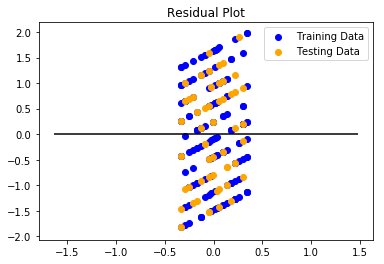

In [11]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9512973525715144, R2: -0.043844656856842246
